#############



绘制变换后的总分和MSE



#############

In [1]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
# pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
pd.set_option('display.max_columns', None) #输出所有列

def set_ch():
    from pylab import mpl
    #中文字体问题已经解决，记录在evernote中
    #mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
set_ch()
from datetime import datetime,timedelta
import matplotlib
matplotlib.style.use('ggplot')
import sys
import json

In [2]:
import seaborn as sns

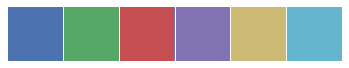

In [3]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [4]:
df_all= pd.read_csv('data/ss_cs_human.csv').drop(['Unnamed: 0'], axis=1)

Text(-0.5,0.7738,u'0.7638')

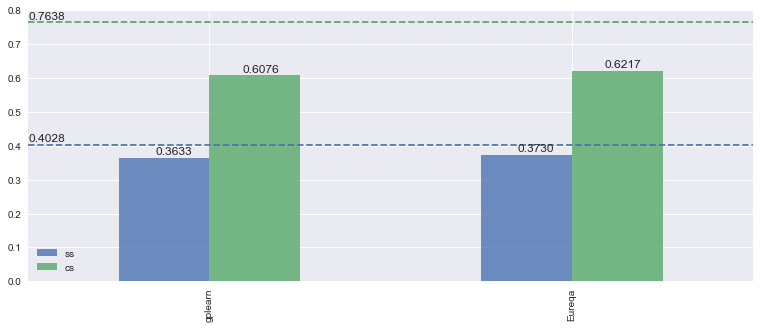

In [41]:
# 全数据Norm
df_all_norm = DataFrame()
df_all_norm['gplearn'] = [0.3633,0.6076]
df_all_norm['Eureqa'] = [0.3730,0.6217]
df_all_norm.index = ['ss','cs']

plt.rc('figure', figsize=(13, 5))
df_all_norm.T.plot(kind='bar',legend=True,alpha=0.8)
plt.annotate('0.3633',[0-0.15,0.3733])
plt.annotate('0.6076',[0+0.09,0.6176])
plt.annotate('0.3730',[1-0.15,0.3830])
plt.annotate('0.6217',[1+0.09,0.6317])

plt.axhline(0.4028,color=sns.color_palette()[0],label='ss',linestyle='--')
plt.axhline(0.7638,color=sns.color_palette()[1],label='cs',linestyle='--')
plt.annotate('0.4028',[0-0.5,0.4128])
plt.annotate('0.7638',[0-0.5,0.7738])

In [429]:
def plot_trans_mse(df, base_li,num):
    if num == 2:
        plt.rc('figure', figsize=(13, 4))
        df.T.plot(kind='bar',legend=True,alpha=0.8)
        plt.annotate(round(df.ix[:,0][0],4), [0-0.15, round(df.ix[:,0][0],4)+0.01])
        plt.annotate(round(df.ix[:,0][1],4), [0+0.09, round(df.ix[:,0][1],4)+0.01])
        plt.annotate(round(df.ix[:,1][0],4), [1-0.15, round(df.ix[:,1][0],4)+0.01])
        plt.annotate(round(df.ix[:,1][1],4), [1+0.09, round(df.ix[:,1][1],4)+0.01])

        plt.axhline(base_li[0],color=sns.color_palette()[0],label='ss',linestyle='--')
        plt.axhline(base_li[1],color=sns.color_palette()[1],label='cs',linestyle='--')
        plt.annotate(base_li[0],[0-0.5,base_li[0]+0.01])
        plt.annotate(base_li[1],[0-0.5,base_li[1]+0.01])
        plt.show()
    else :
        plt.rc('figure', figsize=(6.5, 8))
        df.T.plot(kind='bar',legend=True,alpha=0.8)
        plt.annotate(round(df.ix[:,0][0],4), [0-0.15, round(df.ix[:,0][0],4)+0.001])
        plt.annotate(round(df.ix[:,0][1],4), [0+0.09, round(df.ix[:,0][1],4)+0.001])

        plt.axhline(base_li[0],color=sns.color_palette()[0],label='ss',linestyle='--')
        plt.axhline(base_li[1],color=sns.color_palette()[1],label='cs',linestyle='--')
        plt.annotate(base_li[0],[0-0.5,base_li[0]+0.001])
        plt.annotate(base_li[1],[0-0.5,base_li[1]+0.001])
        plt.show()

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


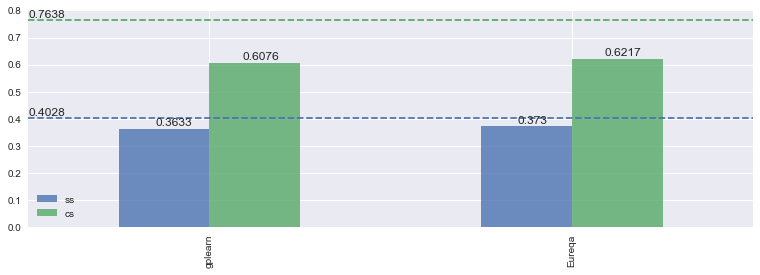

In [55]:
df_all_norm = DataFrame()
df_all_norm['gplearn'] = [0.3633,0.6076]
df_all_norm['Eureqa'] = [0.3730,0.6217]
df_all_norm.index = ['ss','cs']

base_li = [0.4028,0.7638]

plot_trans_mse(df_all_norm, base_li,2)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


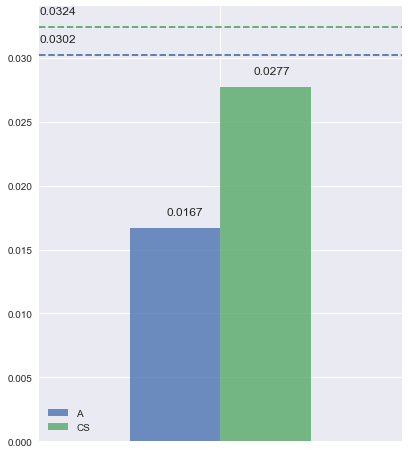

In [470]:
df_all_NOnorm = DataFrame()
df_all_NOnorm[''] = [0.0167, 0.0277]
df_all_NOnorm.index = ['A','CS']

base_li_NOnom = [0.0302,0.0324]
plot_trans_mse(df_all_NOnorm, base_li_NOnom,1)

In [97]:
def plot_split_mse(df,base_li,num):
    if num == 0:
        plt.rc('figure', figsize=(13, 4))
        plt.bar(0,round(df.ix[0,0],4), color=sns.color_palette()[0],alpha=0.5,label='good')
        plt.bar(1,round(df.ix[0,1],4), color="#34495e",alpha=0.5,label='bad')
        plt.annotate(round(df.ix[0,0],4), [0, round(df.ix[0,0],4)+0.01])
        plt.annotate(round(df.ix[0,1],4), [1, round(df.ix[0,1],4)+0.01])

        plt.axhline(base_li,linestyle='--',color='black')
        plt.annotate(base_li,[0-0.45,base_li+0.01])
        plt.show()
    elif num == 1:
        plt.rc('figure', figsize=(13, 4))
        plt.bar(0,round(df.ix[0,0],4), color=sns.color_palette()[1],alpha=0.5,label='good')
        plt.bar(1,round(df.ix[0,1],4), color="#34495e",alpha=0.5,label='bad')
        plt.annotate(round(df.ix[0,0],4), [0, round(df.ix[0,0],4)+0.01])
        plt.annotate(round(df.ix[0,1],4), [1, round(df.ix[0,1],4)+0.01])

        plt.axhline(base_li,linestyle='--',color='black')
        plt.annotate(base_li,[0-0.45,base_li+0.01])
        plt.show()

In [73]:
df_norm_split_ss = DataFrame()
df_norm_split_ss['good'] = [0.5461]
df_norm_split_ss['bad'] = [0.5410]
base_li = 0.4028

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


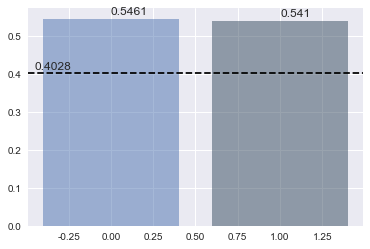

In [98]:
plot_split_mse(df_norm_split_ss,base_li,0)

Text(-0.45,0.4128,u'0.4028')

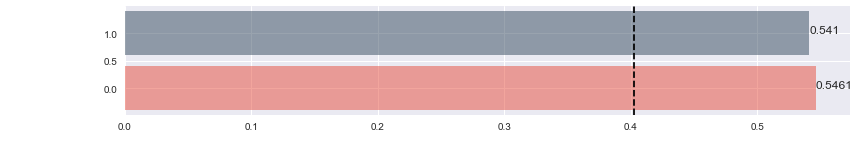

In [114]:
plt.rc('figure', figsize=(13, 2))
plt.barh(0,0.5461, color="#e74c3c",alpha=0.5,label='good')
plt.barh(1,0.5410, color="#34495e",alpha=0.5,label='bad')
plt.annotate(0.5461, [0.5461, 0])
plt.annotate(0.5410, [0.5410, 1])

plt.axvline(base_li,linestyle='--',color='black')
plt.annotate(base_li,[0-0.45,base_li+0.01])

In [118]:
df_all  = pd.read_csv('data/ss_cs_human.csv').drop(['Unnamed: 0'],axis=1)

(0, 1)

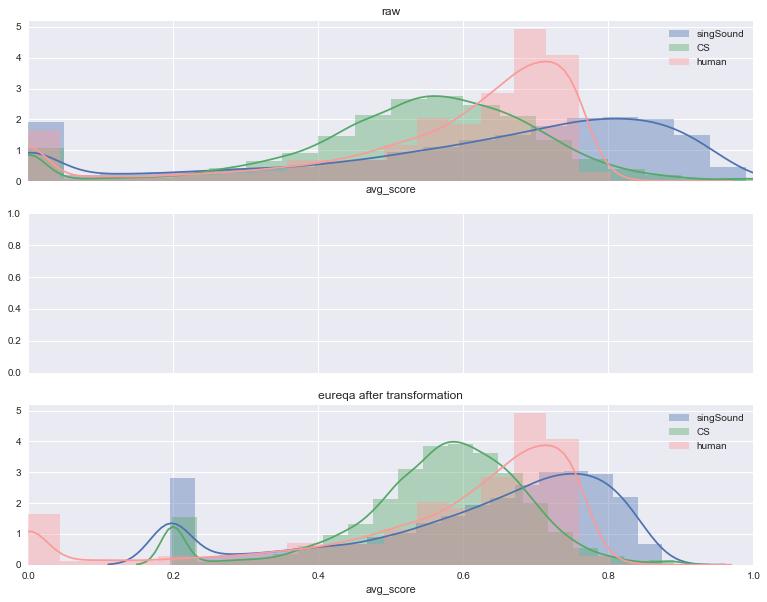

In [120]:
f, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(13, 10), sharex=True)

# 原始分布
sns.distplot(df_all.result_overall/100,ax=ax1, label='singSound',bins=20)
sns.distplot(df_all.ppScores,ax=ax1, label='CS',bins=20)
sns.distplot(df_all.avg_score/4,ax=ax1, label='human',color=sns.color_palette("Paired")[4],bins=20)
ax1.legend()
ax1.set_title('raw')
ax1.set_xlim(0,1)


# 转换后的分布
sns.distplot(df_all.result_overall/100 * 0.685 +0.196,ax=ax3, label='singSound',bins=20)
sns.distplot(df_all.ppScores * 0.691 + 0.199,ax=ax3, label='CS',bins=20)
sns.distplot(df_all.avg_score/4,ax=ax3, label='human', color=sns.color_palette("Paired")[4],bins=20)
ax3.legend()
ax3.set_title('eureqa after transformation')
ax3.set_xlim(0,1)

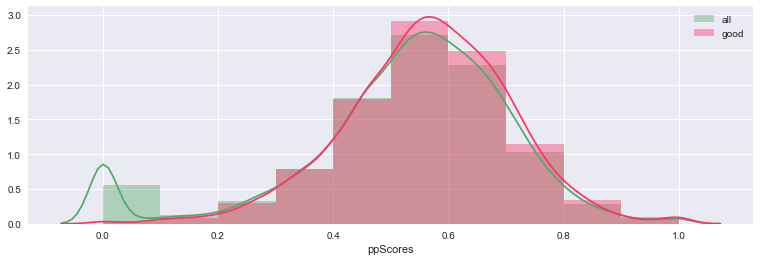

In [8]:
plt.rc('figure', figsize=(13, 4))
sns.distplot(df_all.ppScores, label='all',color=sns.color_palette()[1],bins=10)
sns.distplot(df_all[df_all.AQstatus == 0].ppScores, label='good',color="#FF3366",bins=10)
plt.legend()

In [10]:
np.array([len(df_all[df_all.result_info_tipId == 0][df_all.AQstatus == 0]),
 len(df_all[df_all.result_info_tipId == 0][df_all.AQstatus != 0]),
 len(df_all[df_all.result_info_tipId != 0][df_all.AQstatus == 0]),
 len(df_all[df_all.result_info_tipId != 0][df_all.AQstatus != 0]),
]).reshape(2,2)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


array([[5945, 1549],
       [1604, 3459]])

In [12]:
(5945 + 3459) / len(df_all)

0.7489049932308672

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


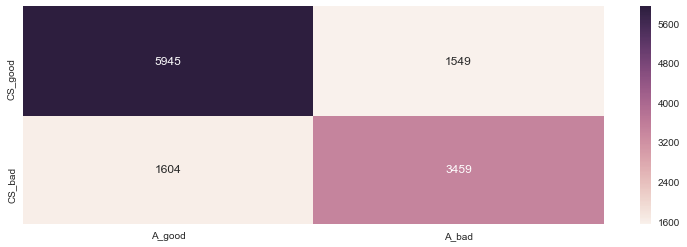

In [451]:
df_AQ = DataFrame(np.array([len(df_all[df_all.result_info_tipId == 0][df_all.AQstatus == 0]),
 len(df_all[df_all.result_info_tipId == 0][df_all.AQstatus != 0]),
 len(df_all[df_all.result_info_tipId != 0][df_all.AQstatus == 0]),
 len(df_all[df_all.result_info_tipId != 0][df_all.AQstatus != 0]),
]).reshape(2,2))
df_AQ.index = ['CS_good', u'CS_bad']
df_AQ.columns = ['A_good', u'A_bad']
sns.heatmap(df_AQ, annot=True, fmt='')

In [459]:
df_acc = DataFramed(np.array(f_good_ss = df_all[df_all.result_info_tipId == 0]
df_good_ss = pd.concat([df_good_ss, df_all[df_all.result_info_tipId != 0][df_all.result_overall >= 60]],axis=0)
df_bad_ss = df_all[df_all.result_info_tipId != 0][df_all.result_overall < 60]).reshape(2,2))
df_acc.index = ['CS_accuract', u'CS_not_accuract']
df_acc.columns = ['A_accuract', u'A_not_accuract']
sns.heatmap(df_acc, annot=True, fmt='')

SyntaxError: invalid syntax (<ipython-input-459-596f67f6819e>, line 2)

In [113]:
df_good_cs = df_all[df_all.AQstatus == 0]
df_bad_cs = df_all[df_all.AQstatus != 1]

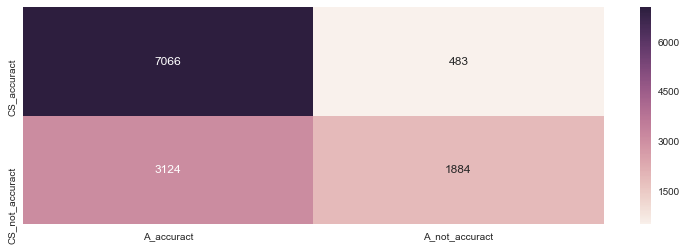

In [460]:
df_acc = DataFrame(np.array([len(df_good_ss[df_good_ss.AQstatus == 0]),
len(df_bad_ss[df_bad_ss.AQstatus == 0]),
len(df_good_ss[df_good_ss.AQstatus !=0]),
len(df_bad_ss[df_bad_ss.AQstatus !=0])]).reshape(2,2))
df_acc.index = ['CS_accuract', u'CS_not_accuract']
df_acc.columns = ['A_accuract', u'A_not_accuract']
sns.heatmap(df_acc, annot=True, fmt='')

In [81]:
trans_ss = df_all.result_overall / 100 * 0.799
trans_cs = df_all.ppScores * 0.66

In [82]:
(trans_ss.min(), trans_ss.max(), trans_cs.min(), trans_cs.max())

(0.0, 0.79100999999999999, 0.0, 0.66000000000000003)

In [83]:
trans_ss = df_good_ss.result_overall / 100 * 0.531 + 0.247
trans_cs = df_good_cs.ppScores * 0.398 + 0.378

In [84]:
(trans_ss.min(), trans_ss.max(), trans_cs.min(), trans_cs.max())

(0.247, 0.77268999999999999, 0.378, 0.77600000000000002)

In [133]:
norm_ss = (df_good_ss.result_overall - df_good_ss.result_overall.mean()) / df_good_ss.result_overall.std()
norm_cs = (df_good_cs.ppScores - df_good_cs.ppScores.mean()) / df_good_cs.ppScores.std()

In [134]:
len(norm_ss)

10190

In [135]:
trans_ss = norm_ss * 0.758
trans_cs = np.log(abs(norm_cs)) * 0.926

In [136]:
(trans_ss.min(), trans_ss.max(), trans_cs.min(), trans_cs.max())

(-2.524592659752821,
 1.0829797989319703,
 -5.5858121193717345,
 1.2545194096988894)

In [89]:
import math

In [137]:
trans_ss = 1 / (1+pow(math.e,(-trans_ss)))
trans_cs = 1 / (1+pow(math.e,(-trans_cs)))

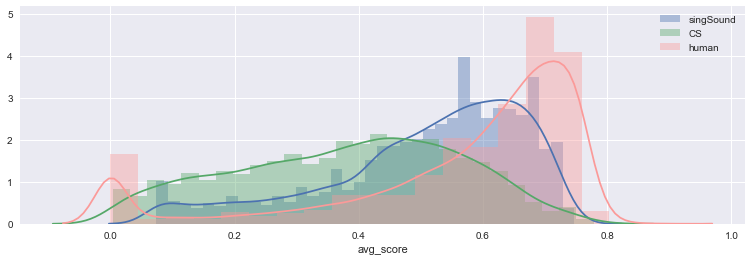

In [100]:
plt.rc('figure', figsize=(13, 4))
sns.distplot(trans_ss, label='singSound')
sns.distplot(trans_cs, label='CS')
sns.distplot(df_all.avg_score/4, color=sns.color_palette("Paired")[4], bins=20, label='human')
plt.legend()

(0, 1)

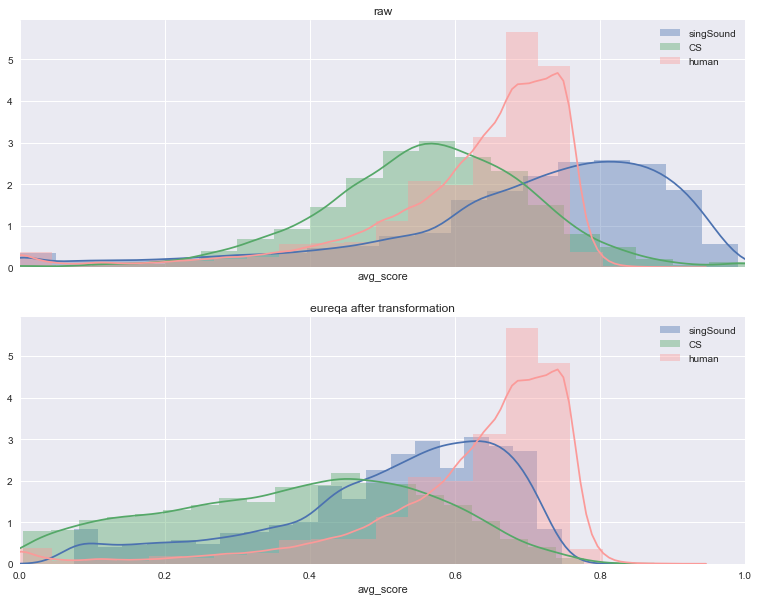

In [120]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 10), sharex=True)

# 原始分布
sns.distplot(df_good_ss.result_overall / 100,ax=ax1, label='singSound',bins=20)
sns.distplot(df_good_cs.ppScores,ax=ax1, label='CS',bins=20)
sns.distplot(df_good_ss.avg_score/4,ax=ax1, label='human',color=sns.color_palette("Paired")[4],bins=20)
ax1.legend()
ax1.set_title('raw')
ax1.set_xlim(0,1)


# 转换后的分布
sns.distplot(trans_ss,ax=ax2, label='singSound',bins=20)
sns.distplot(trans_cs,ax=ax2, label='CS',bins=20)
sns.distplot(df_good_ss.avg_score/4,ax=ax2, label='human', color=sns.color_palette("Paired")[4],bins=20)
ax2.legend()
ax2.set_title('eureqa after transformation')
ax2.set_xlim(0,1)

In [104]:
(trans_ss.min(), trans_ss.max(), trans_cs.min(), trans_cs.max())

(0.074152025674895899,
 0.74705746832353881,
 0.0037366873119043385,
 0.77808121208430636)

In [105]:
from sklearn.metrics import mean_squared_error

In [117]:
(mean_squared_error(trans_ss, df_good_ss.avg_score/4),
mean_squared_error(trans_cs, df_good_cs.avg_score/4))

(0.026040321505826951, 0.11532105051413952)

In [110]:
len(trans_cs)

7549

In [121]:
norm_ss = (df_good_ss.result_overall - df_good_ss.result_overall.mean()) / df_good_ss.result_overall.std()
norm_cs = (df_good_cs.ppScores - df_good_cs.ppScores.mean()) / df_good_cs.ppScores.std()

In [122]:
trans_ss = 1 / (1+pow(math.e,(-norm_ss)))
trans_cs = 1 / (1+pow(math.e,(-norm_cs)))

In [123]:
(mean_squared_error(trans_ss, df_good_ss.avg_score/4),
mean_squared_error(trans_cs, df_good_cs.avg_score/4))

(0.030474468279725751, 0.053390669692323825)

In [131]:
(7066 + 483) / (7066 + 3124 + 483 + 1884)

0.6011786254678665

----

In [180]:
(pow(trans_ss, 0.4).min(), pow(trans_ss, 0.4).max())

(0.35322318953772891, 0.88990081538010479)

(0, 1)

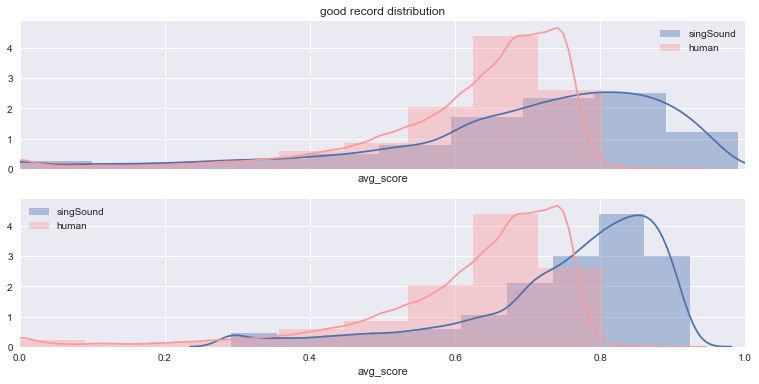

In [252]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 6), sharex=True)
plt.rc('figure', figsize=(13, 4))

sns.distplot(df_good_ss.result_overall / 100,label='singSound',bins=10,ax=ax1)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=10,ax=ax1)
ax1.legend()
ax1.set_title("good record distribution")
ax1.set_xlim(0,1)

sns.distplot(pow(trans_ss, 0.5)/(0.935),label='singSound',bins=10,ax=ax2)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=10,ax=ax2)
ax2.legend()
ax2.set_xlim(0,1)

In [250]:
test = pow(trans_ss, 0.5)/(0.935)

In [251]:
test.min(),test.max()

(0.29123924658294703, 0.92441161788704995)

In [236]:
test2 = df_good_ss.result_overall / 100
test.min(), test2.max()

(0.28664073216321634, 0.98999999999999999)

In [249]:
mean_squared_error(pow(trans_ss, 0.5)/(0.935), df_good_ss.avg_score/4)

0.029544783592654909

Text(13,1,u'90.5%')

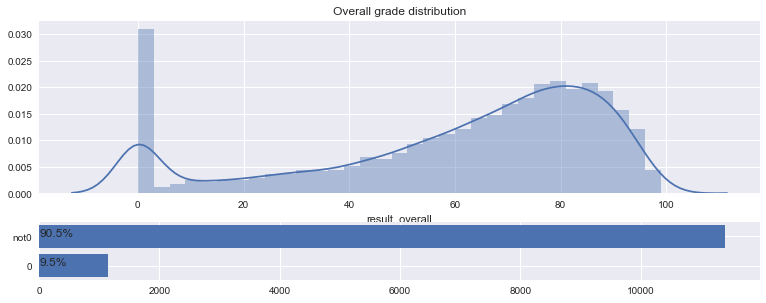

In [201]:
import seaborn as sns
plt.rc('figure', figsize=(13, 4))

overall_li = []
overall_0 = df_all.result_overall.value_counts()[0]
overall_not0 = len(df_all) - overall_0
overall_li.append(overall_not0)
overall_li.append(overall_0)

rect1 = [0.14, 0.35, 0.77, 0.6] # [左, 下, 宽, 高] 规定的矩形区域 （全部是0~1之间的数，表示比例）
rect2 = [0.14, 0.05, 0.77, 0.2]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)

sns.distplot(df_all.result_overall,ax=ax1)
ax1.set_title('Overall grade distribution')

ax2.barh(['not0','0'],overall_li)
ax2.annotate('9.5%',xy=[13,0])
ax2.annotate('90.5%',xy=[13,1])
#ax2.set_title('Proportion of 0grade & not0grade')

Text(13,1,u'95.3%')

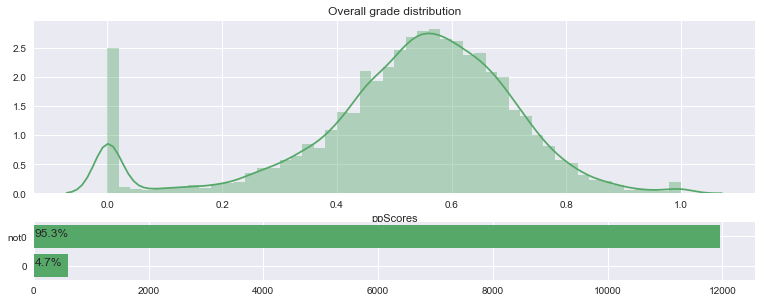

In [205]:
import seaborn as sns
plt.rc('figure', figsize=(13, 4))

overall_li = []
overall_0 = df_all.ppScores.value_counts()[0]
overall_not0 = len(df_all) - overall_0
overall_li.append(overall_not0)
overall_li.append(overall_0)

rect1 = [0.14, 0.35, 0.77, 0.6] # [左, 下, 宽, 高] 规定的矩形区域 （全部是0~1之间的数，表示比例）
rect2 = [0.14, 0.05, 0.77, 0.2]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)

sns.distplot(df_all.ppScores,ax=ax1,color=sns.color_palette()[1])
ax1.set_title('Overall grade distribution')

ax2.barh(['not0','0'],overall_li,color=sns.color_palette()[1])
ax2.annotate('4.7%',xy=[13,0])
ax2.annotate('95.3%',xy=[13,1])
#ax2.set_title('Proportion of 0grade & not0grade')

In [206]:
len(df_all[df_all.AQstatus == 0]) / len(df_all)

0.6011786254678665

In [207]:
len(df_all[df_all.result_info_tipId== 0]) / len(df_all)

0.5967985983913355

(0, 1)

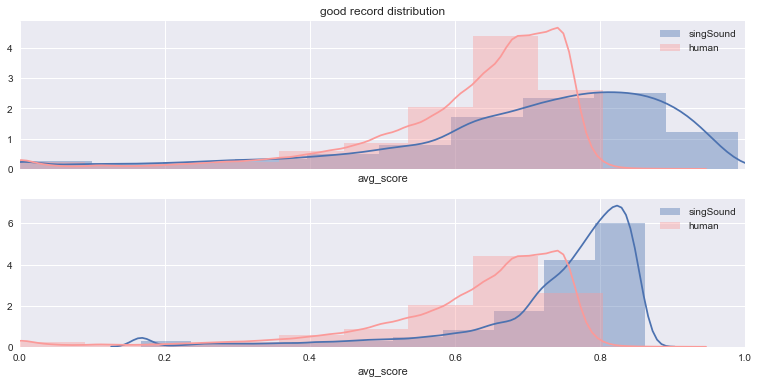

In [276]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 6), sharex=True)
plt.rc('figure', figsize=(13, 4))

sns.distplot(df_good_ss.result_overall / 100,label='singSound',bins=10,ax=ax1)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=10,ax=ax1)
ax1.legend()
ax1.set_title("good record distribution")
ax1.set_xlim(0,1)

sns.distplot((-0.414 * pow(df_good_ss.result_overall/100,2) + df_good_ss.result_overall/100 + 0.14) /0.84,label='singSound',bins=10,ax=ax2)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=10,ax=ax2)
ax2.legend()
ax2.set_xlim(0,1)

In [274]:
test = -0.414 * pow(df_good_ss.result_overall/100,2) + df_good_ss.result_overall/100 + 0.14
test = test / 0.84
test.min(), test.max()

(0.16666666666666669, 0.8621888095238095)

In [275]:
mean_squared_error(test,df_good_ss.avg_score/4)

0.025100305169598349

In [283]:
test =0.611*norm_ss -0.078* pow(norm_ss,2)

In [284]:
test = 1 / (1+pow(math.e,(-test)))

In [302]:
mean_squared_error(test, df_good_ss.avg_score/4)

0.022938246092784099

(0, 1)

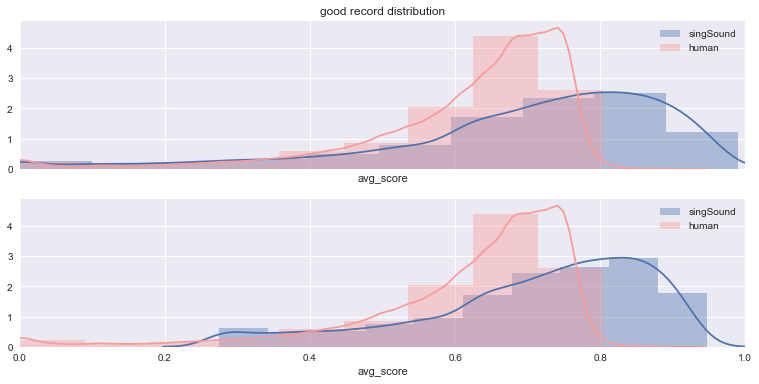

In [301]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 6), sharex=True)
plt.rc('figure', figsize=(13, 4))

sns.distplot(df_good_ss.result_overall / 100,label='singSound',bins=10,ax=ax1)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=10,ax=ax1)
ax1.legend()
ax1.set_title("good record distribution")
ax1.set_xlim(0,1)

sns.distplot( test,label='singSound',bins=10,ax=ax2)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=10,ax=ax2)
ax2.legend()
ax2.set_xlim(0,1)

In [300]:
test = (norm_ss * 0.758)
test = 1 / (1+pow(math.e,(-test))) + 0.2

In [299]:
test.min() + 0.2, test.max()+0.2

(0.27415202567489594, 0.94705746832353888)

In [304]:
ss_good = df_good_ss.result_overall

In [305]:
ss_good

0        80.0
1        56.0
2        95.0
6        64.0
9        96.0
11       74.0
12       59.0
13       82.0
14       80.0
15       74.0
16       80.0
19       80.0
26       50.0
27       64.0
40       91.0
41       88.0
42       80.0
43       75.0
44       90.0
45       86.0
47       82.0
48       85.0
53       65.0
54       64.0
55       75.0
56       68.0
57       54.0
60       63.0
61       87.0
62       86.0
         ... 
12326    90.0
12344    94.0
12371    89.0
12372    88.0
12394    73.0
12410    85.0
12423    92.0
12424    62.0
12425    78.0
12430    84.0
12432    92.0
12433    83.0
12436    69.0
12437    71.0
12447    71.0
12462    61.0
12467    75.0
12480    90.0
12489    63.0
12492    87.0
12509    66.0
12515    63.0
12517    62.0
12528    60.0
12529    69.0
12534    93.0
12538    88.0
12541    68.0
12546    69.0
12555    66.0
Name: result_overall, Length: 10190, dtype: float64

In [309]:
from sklearn.metrics import mean_squared_error

In [321]:
div_val_li = np.arange(1,2,0.1)
div_singSound_li = []
for a in div_val_li:
    div_singSound_li.append(mean_squared_error(pow(ss_good/100, a) / pow(1,a-1), df_good_ss.avg_score/4))

Text(0,0.5,u'MSE')

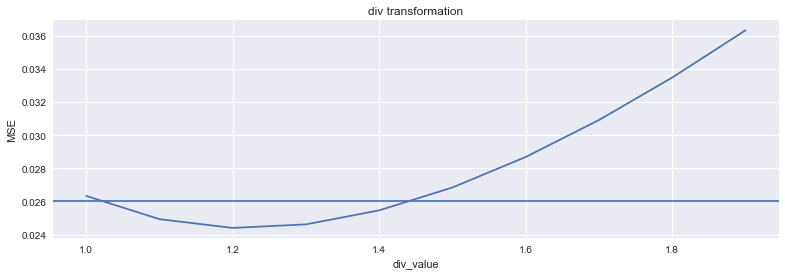

In [322]:
plt.plot(div_val_li,div_singSound_li,label='singSound')
plt.axhline(0.026,color=sns.color_palette()[0],label='singSound')
#plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('div transformation')
plt.xlabel('div_value')
plt.ylabel('MSE')

In [316]:
mean_squared_error(df_good_ss.result_overall/100, df_good_ss.avg_score/4)

0.026337800671000982

In [320]:
ss_good.min(), ss_good.max()

(0.0, 99.0)

In [324]:
test= pow(ss_good/100, 1.2) / pow(1,0.2)

(0, 1)

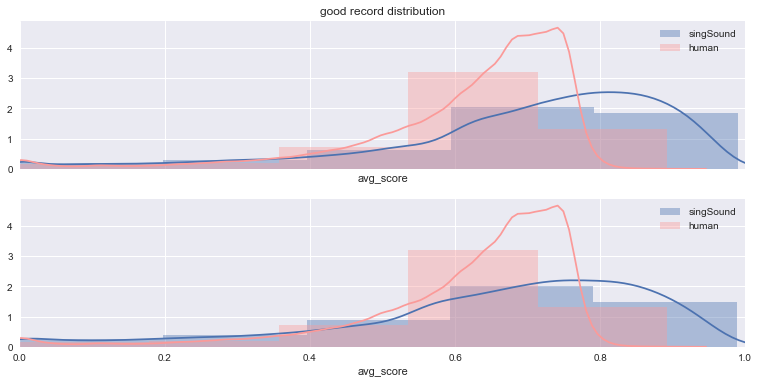

In [328]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 6), sharex=True)
plt.rc('figure', figsize=(13, 4))

sns.distplot(df_good_ss.result_overall / 100,label='singSound',bins=5,ax=ax1)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=5,ax=ax1)
ax1.legend()
ax1.set_title("good record distribution")
ax1.set_xlim(0,1)

sns.distplot(test,label='singSound',bins=5,ax=ax2)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=5,ax=ax2)
ax2.legend()
ax2.set_xlim(0,1)

In [332]:
test2 = 1/ (1+ pow(math.e, -(norm_ss * 0.758)))

In [331]:
test2

0        1.676639
1        2.622463
2        1.391716
6        2.212185
9        1.377698
11       1.841999
12       2.454446
13       1.629079
14       1.676639
15       1.841999
16       1.676639
19       1.676639
26       3.018968
27       2.212185
40       1.453183
41       1.505535
42       1.676639
43       1.811869
44       1.470002
45       1.543754
47       1.629079
48       1.563934
53       2.168808
54       2.212185
55       1.811869
56       2.047770
57       2.745124
60       2.257172
61       1.524296
62       1.543754
           ...   
12326    1.470002
12344    1.406253
12371    1.487445
12372    1.505535
12394    1.873247
12410    1.563934
12423    1.436966
12424    2.303828
12425    1.727794
12430    1.584863
12432    1.436966
12433    1.606568
12436    2.010276
12437    1.939266
12447    1.939266
12462    2.352216
12467    1.811869
12480    1.470002
12489    2.257172
12492    1.524296
12509    2.126983
12515    2.257172
12517    2.303828
12528    2.402400
12529    2

(0, 1)

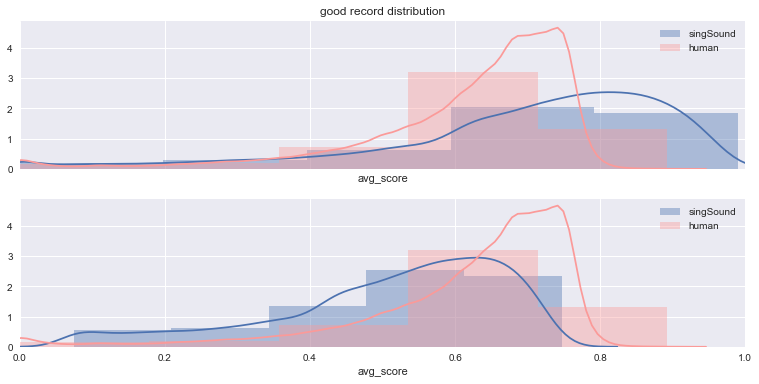

In [333]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 6), sharex=True)
plt.rc('figure', figsize=(13, 4))

sns.distplot(df_good_ss.result_overall / 100,label='singSound',bins=5,ax=ax1)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=5,ax=ax1)
ax1.legend()
ax1.set_title("good record distribution")
ax1.set_xlim(0,1)

sns.distplot(test2,label='singSound',bins=5,ax=ax2)
sns.distplot(df_good_ss.avg_score/4,color=sns.color_palette("Paired")[4],label='human',bins=5,ax=ax2)
ax2.legend()
ax2.set_xlim(0,1)

In [433]:
df_3engine = pd.read_csv('data/3engine.csv').drop(['Unnamed: 0'],axis=1)

(0, 1)

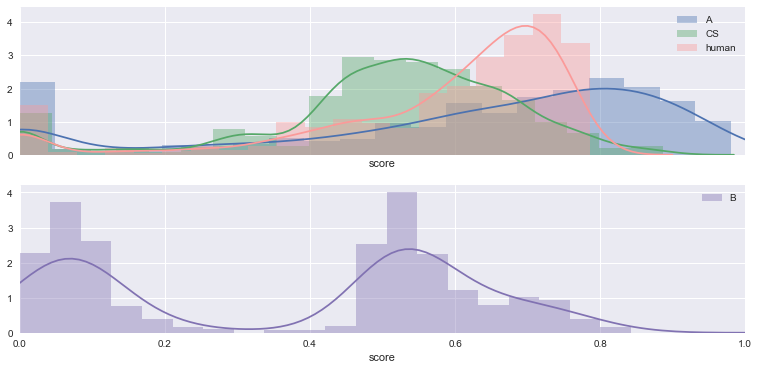

In [468]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 6), sharex=True)
plt.rc('figure', figsize=(13, 4))

sns.distplot(df_3engine.result_overall / 100, label='A',bins=20,ax=ax1)
sns.distplot(df_3engine.ppScores, label='CS',bins=20,ax=ax1)
sns.distplot(df_3engine.avg_score/4, label='human',color=sns.color_palette("Paired")[4],bins=20,ax=ax1)
ax1.legend()
ax1.set_xlim(0,1)
ax1.set_xlabel('score')

sns.distplot(df_3engine.score/5, label='B',color=sns.color_palette()[3],bins=20,ax=ax2)
ax2.legend()
ax2.set_xlim(0,1)

In [435]:
len(df_3engine)

1699

In [436]:
print 'singSound-human: %s' % mean_squared_error(df_3engine.result_overall / 100, df_3engine.avg_score/4)
print 'CS-human: %s' % mean_squared_error(df_3engine.ppScores, df_3engine.avg_score/4)
print 'xunfei-human: %s' % mean_squared_error(df_3engine.score/5, df_3engine.avg_score/4)

singSound-human: 0.0370948983218
CS-human: 0.0349904035308
xunfei-human: 0.147222503766


In [437]:
print 'singSound-xunfei: %s' % mean_squared_error(df_3engine.result_overall / 100, df_3engine.score/5)
print 'CS-xunfei: %s' % mean_squared_error(df_3engine.ppScores, df_3engine.score/5)

singSound-xunfei: 0.215808512068
CS-xunfei: 0.124927954726


In [425]:
len(df_3engine)

728

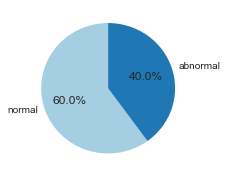

In [447]:
plt.figure(figsize=(3,3))
#定义饼状图的标签，标签是列表
labels = ['normal','abnormal']
#每个标签占多大，会自动去算百分比
sizes = [60,40]
patches,l_text,p_text = plt.pie(sizes,labels=labels,colors=sns.color_palette("Paired"),
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)



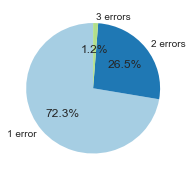

In [448]:
plt.figure(figsize=(3,3))
#定义饼状图的标签，标签是列表
labels = ['1 error','2 errors','3 errors']
#每个标签占多大，会自动去算百分比
sizes = [72.3,26.5,1.2]
patches,l_text,p_text = plt.pie(sizes,labels=labels,colors=sns.color_palette("Paired"),
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)



Text(0.5,0,u'score')

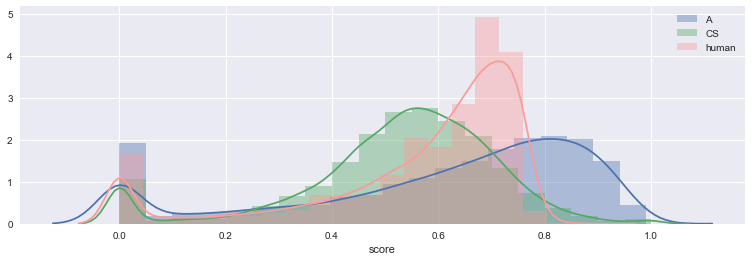

In [467]:
sns.distplot(df_all.result_overall/100,label='A',bins=20)
sns.distplot(df_all.ppScores, label='CS',bins=20)
sns.distplot(df_all.avg_score/4,color=sns.color_palette("Paired")[4],label="human",bins=20)
plt.legend()
plt.xlabel('score')

Text(0.5,1,u'after transformation')

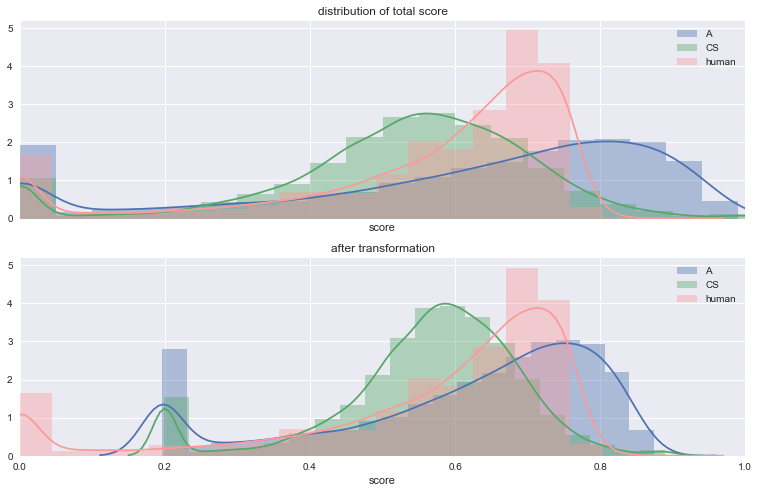

In [477]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=True)
plt.rc('figure', figsize=(13, 4))

sns.distplot(df_all.result_overall / 100, label='A',bins=20,ax=ax1)
sns.distplot(df_all.ppScores, label='CS',bins=20,ax=ax1)
sns.distplot(df_all.avg_score/4, label='human',color=sns.color_palette("Paired")[4],bins=20,ax=ax1)
ax1.legend()
ax1.set_xlim(0,1)
ax1.set_xlabel('score')
ax1.set_title('distribution of total score')

sns.distplot(df_all.result_overall / 100 *0.685 + 0.196, label='A',bins=20,ax=ax2)
sns.distplot(df_all.ppScores * 0.691 + 0.199, label='CS',bins=20,ax=ax2)
sns.distplot(df_all.avg_score/4, label='human',color=sns.color_palette("Paired")[4],bins=20,ax=ax2)
ax2.legend()
ax2.set_xlim(0,1)
ax2.set_xlabel('score')
ax2.set_title('after transformation')

Text(0.5,1,u'after transformation')

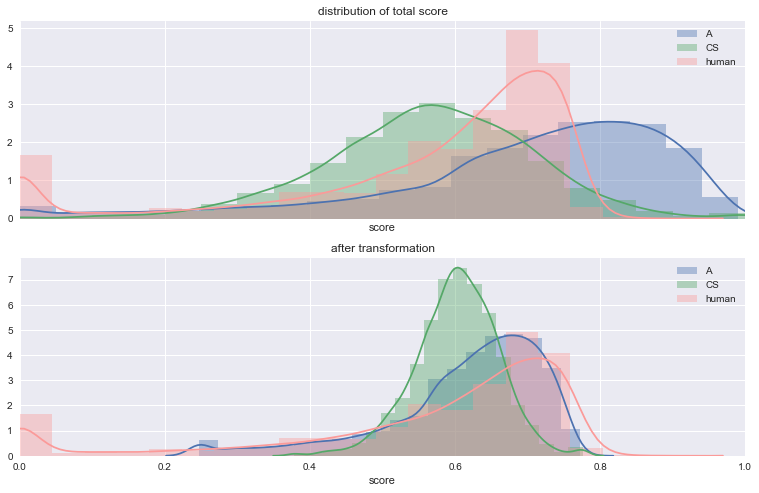

In [478]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=True)
plt.rc('figure', figsize=(13, 4))

sns.distplot(df_good_ss.result_overall / 100, label='A',bins=20,ax=ax1)
sns.distplot(df_good_cs.ppScores, label='CS',bins=20,ax=ax1)
sns.distplot(df_all.avg_score/4, label='human',color=sns.color_palette("Paired")[4],bins=20,ax=ax1)
ax1.legend()
ax1.set_xlim(0,1)
ax1.set_xlabel('score')
ax1.set_title('distribution of total score')

sns.distplot(df_good_ss.result_overall / 100 *0.531 + 0.247, label='A',bins=20,ax=ax2)
sns.distplot(df_good_cs.ppScores * 0.398 + 0.378, label='CS',bins=20,ax=ax2)
sns.distplot(df_all.avg_score/4, label='human',color=sns.color_palette("Paired")[4],bins=20,ax=ax2)
ax2.legend()
ax2.set_xlim(0,1)
ax2.set_xlabel('score')
ax2.set_title('after transformation')